In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns

In [2]:
train_raw = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


get labels

get dummy variable for categorical features

In [5]:
train_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


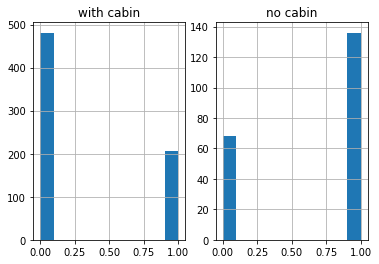

In [7]:
plt.subplot(1,2,2)
train_raw.loc[train_raw.Cabin.notna(), 'Survived'].hist()
plt.title('no cabin')
plt.subplot(1,2,1)
train_raw.loc[train_raw.Cabin.isna(), 'Survived'].hist()
plt.title('with cabin')
plt.show()

In [8]:
train_raw['Cabin'] = train_raw.Cabin.str[0]

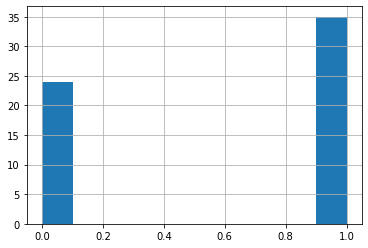

In [9]:
train_raw.loc[train_raw.Cabin == 'C', 'Survived'].hist()

In [10]:
train_raw.Cabin.fillna('other', inplace=True)

In [11]:
labels = train_raw.Survived
test.drop('PassengerId', axis=1, inplace=True)

In [12]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
def preprocess_train_w_three_features(train, labels):

    Pclass_cat = pd.get_dummies(train.Pclass)
    cabin_cat = pd.get_dummies(train.Cabin)
    sex_cat = pd.get_dummies(train.Sex)

    train = pd.concat([Pclass_cat, cabin_cat, sex_cat], axis=1)
    
    print(train.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2)

    svc = SVC()
    svc.fit(X_train, y_train)

    preds = svc.predict(X_test)
    print('validation accuracy:', accuracy_score(preds, y_test))
    
    return svc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ab9cbd0>,
      dtype=object)

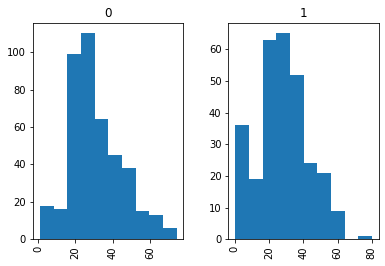

In [29]:
train_raw.hist('Age', by='Survived')